# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/loan_data_train_set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/loan_data_test_set.csv')

In [4]:
train.shape, test.shape

((614, 13), (367, 12))

# Data Pre-processing

**Viewing the training set**

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Viewing the test dataset**

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Handling Missing Data**

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
train.Gender = train.Gender.fillna(train.Gender.mode()[0])
test.Gender = test.Gender.fillna(test.Gender.mode()[0])

train.Married = train.Married.fillna(train.Married.mode()[0])

train.Dependents = train.Dependents.fillna(train.Dependents.mode()[0])
test.Dependents = test.Dependents.fillna(test.Dependents.mode()[0])

train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode()[0])
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode()[0])

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.median())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.median())

train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.median())
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.median())

train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History = test.Credit_History.fillna(test.Credit_History.mode()[0])

In [12]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Counting frequency of categories for each categorical features**

In [13]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      502
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    401
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


**Handling Outliers**

In [14]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(Q1,"\n\n",Q3,"\n\n",IQR)

ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.25, dtype: float64 

 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64 

 ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [15]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [16]:
outlier = []
for x in train['LoanAmount']:
    if ((x> up_lim['LoanAmount']) or (x<low_lim['LoanAmount'])):
         outlier.append(x)
print(' outlier in the dataset are: ', outlier)

 outlier in the dataset are:  [267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [17]:
len(outlier)

41

We will not remove the outliers because they are in large numbers

# EDA and Visualisations

In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
train.skew(axis = 0, skipna = True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

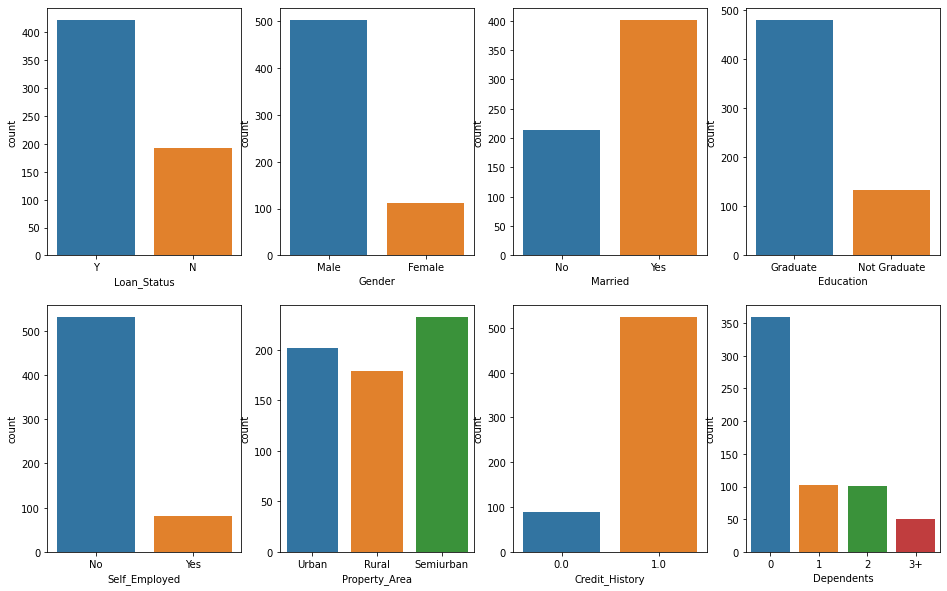

In [20]:
#Univariate Analysis
data = train
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=data,ax=ax[0][0])
sns.countplot('Gender',data=data,ax=ax[0][1])
sns.countplot('Married',data=data,ax=ax[0][2])
sns.countplot('Education',data=data,ax=ax[0][3])
sns.countplot('Self_Employed',data=data,ax=ax[1][0])
sns.countplot('Property_Area',data=data,ax=ax[1][1])
sns.countplot('Credit_History',data=data,ax=ax[1][2])
sns.countplot('Dependents',data=data,ax=ax[1][3])

**Approval of Loans between males and females**

In [21]:
pd.crosstab(train.Gender, train.Loan_Status, margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


>Male Applicants are significantly more than female applicants

**Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)**

In [22]:
sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

**Plotting No. of Dependants (Size of family) in each household**

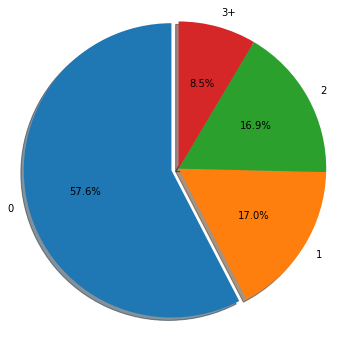

In [23]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [24]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Approval of Loans between different family sizes**

In [25]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


>The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

**Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)**

In [26]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

**Plotting number of people with and without credit history**

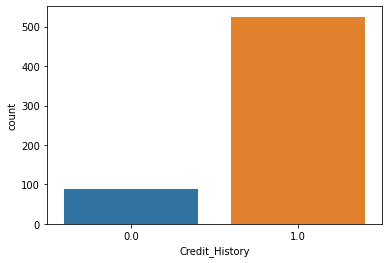

In [27]:
sns.countplot(train['Credit_History'])

**Loan Approval of People those who have a credit history and those who don't**

In [28]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


**Filling up NAN values of Credit history by taking the mode**

In [29]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

**Looking at Self Employed People**

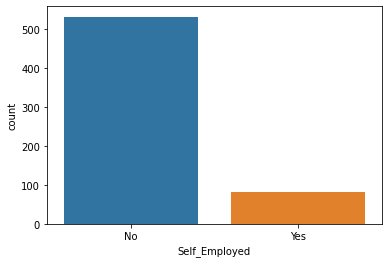

In [30]:
sns.countplot(train['Self_Employed'])

**Loan Approval of people who are self employed and the ones who aren't**

In [31]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


**Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)**

In [32]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

**Plotting Married vs Unmarried People**

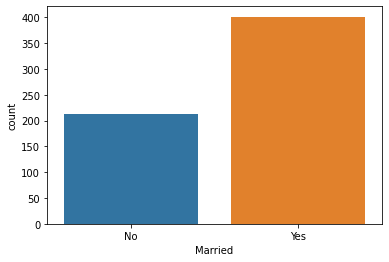

In [33]:
sns.countplot(train.Married)

**Approval of Married vs Unmarried people**

In [34]:
pd.crosstab(train.Married, train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


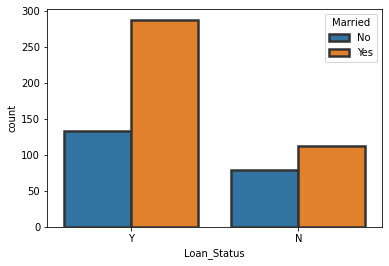

In [35]:
sns.countplot('Loan_Status',hue='Married',linewidth=2.5,edgecolor=".2",data=train)

**Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)**

In [36]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

**Filling up NAN values of Loan Amount Term**

In [37]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

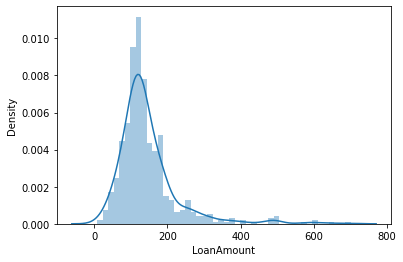

In [38]:
sns.distplot(train['LoanAmount'])

>We observe no outliers in Loan Amount

**Plotting Graduates vs Non Graduates**

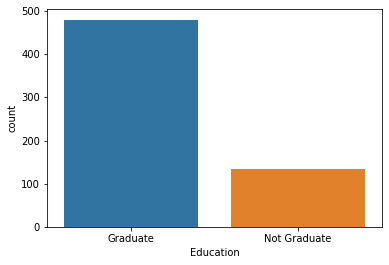

In [39]:
sns.countplot(train.Education)

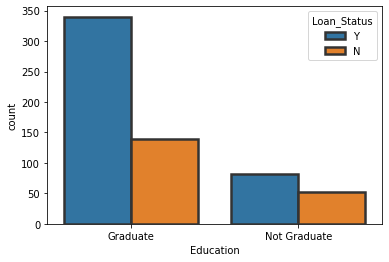

In [40]:
sns.countplot('Education',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=train)

**Converting categorial variables to numerical variables**

In [41]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

**Property Area**

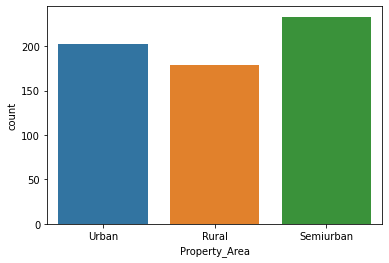

In [42]:
sns.countplot(train.Property_Area)

**Converting Categorical to Numerical**

In [43]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

**Plotting Co-Applicant income and Applicant income**

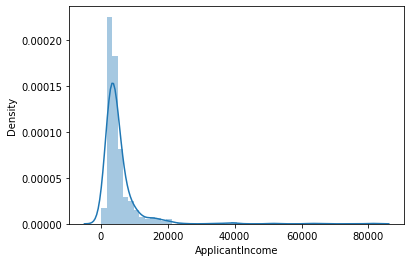

In [44]:
sns.distplot(train['ApplicantIncome'])

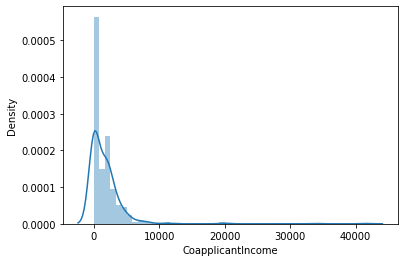

In [45]:
sns.distplot(train['CoapplicantIncome'])

**Target Variable : Loan Status (Converting categorial variables to numerical variables)**

In [46]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

In [47]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

## Correlation Analysis

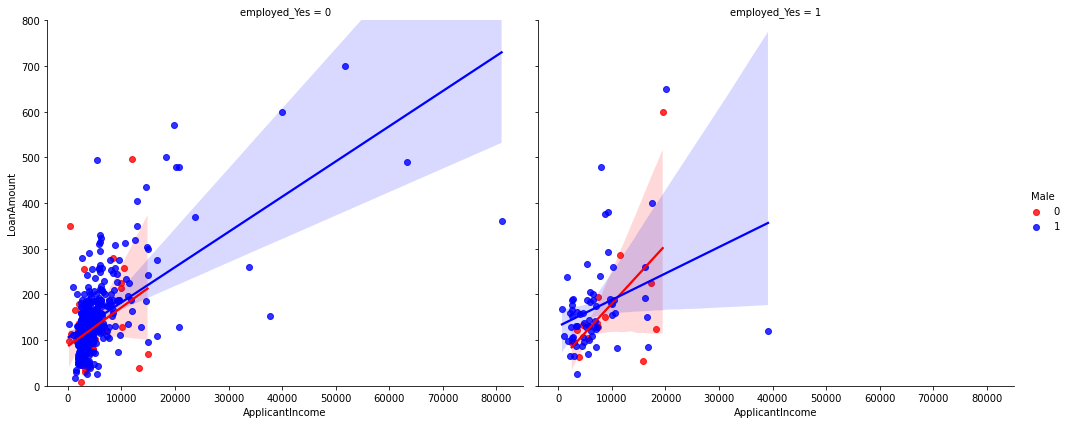

In [48]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

>Conclusions from Above Graph
- The male applicants take more amount of loan than female.
- The males are higher in number of "NOT self employed" category.
- The amount is still larger in the income range in (0 to 20000).
- Also we observe that majority of applicants are NOT self employed.
- Highest Loan amount taken is by the female applicant of about 700 which is NOT self employed.
- The majority of income taken is about 0-200 with income in the range 0-20000. 
- The line plotted shows that with increase in income the amount of loan increases with almost same slope for the case of women in both the cases but a slightely lesser slope in the case of men in Self- Employed category as compared to non-self employed.

**Boxplots for relation between Property Area, Amount of Loan and Education qualification**   <br/>
Property_Area:
- Urban      :0
- Semiurban  :1
- Rural      :2

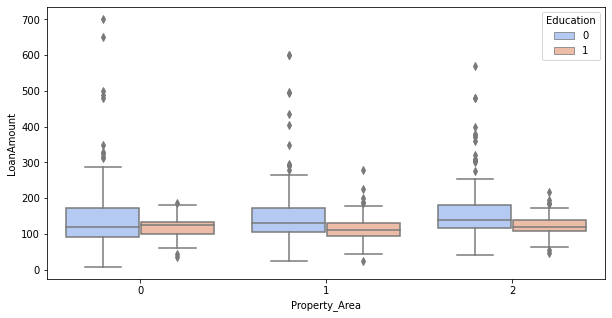

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

>Conclusions from the box plot
- In the Urban area the non graduates take slightly more loan than graduates. 
- In the Rural and semiurban area the graduates take more amount of Loan than non graduates 
- The higher values of Loan are mostly from Urban area 
- The semiurban area and rural area both have one unusual Loan amount close to zero.

**Relation between Credit History and Loan status**

In [50]:
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

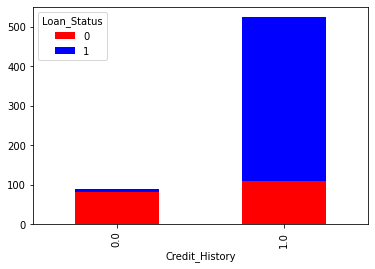

In [51]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

>The credit history vs Loan Status indicates:
- The good credit history applicants have more chances of getting Loan.
- With better credit History the Loan amount given was greater too.
- But many were not given loan in the range 0-100
- The applicant with poor credit history were handled in the range 0-100 only.

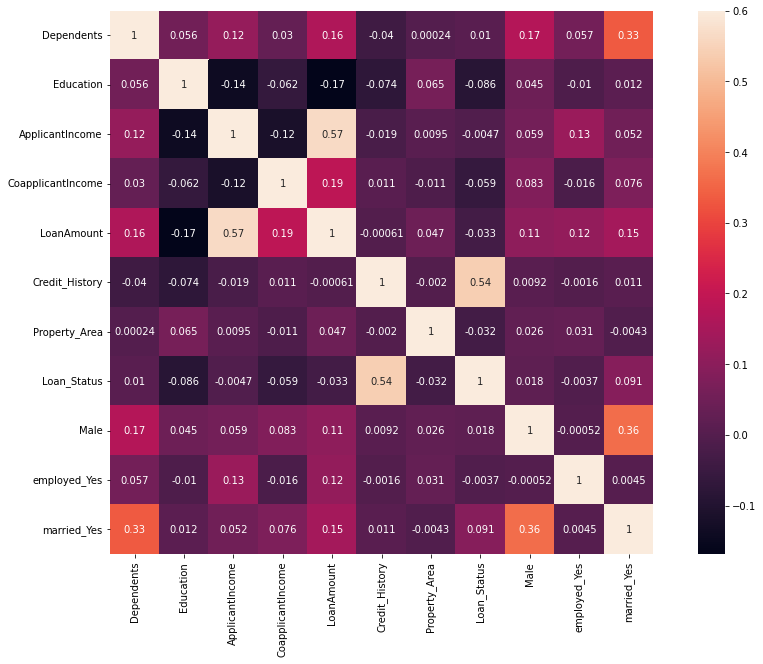

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

# Modelling

This is a **Classification** problem and can be solved by using any Classification Algorithm

In [53]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3 , random_state =10)

**Logistic Regression**

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

80.0

**Random Forest**

In [55]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

77.29729729729729

**K-Nearest Neighbors**

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108


**Gaussian Naive Bayes Classifier**

In [57]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

78.91891891891892

**SVM Classifier**

In [58]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

71.89189189189189

**Gradient Boosting Classifier**

In [59]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

77.29729729729729

In [60]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.000000
3,Naive Bayes,78.918919
1,Random Forrest,77.297297
5,Gradient Boosting Classifier,77.297297
4,SVM,71.891892
2,K- Nearest Neighbour,61.081081


**The Highest Accuracy among Classifiers is shown by Logistic Regression** => 80%

# Hypothesis Testing

**Null Hypothesis (H0)** : There is no difference between performance of Logistic Regression and Naive Bayes Classifier i.e. d = 0

**Alternate Hypothesis (H1)** : There is significant difference between performance of Logistic Regression and Naive Bayes Classifier i.e. d != 0

In [61]:
# use 5x2 statistical hypothesis testing procedure to compare two machine learning algorithms

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=logmodel, estimator2=gaussian, X=X, y=y, scoring='accuracy', random_seed=1)

print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.731, t-Statistic: -0.364


In [62]:
if p <= 0.05:
	print('There is significant difference between performance of Logistic Regression and Naive Bayes Classifier')
else:
	print('There is no difference between performance of Logistic Regression and Naive Bayes Classifier')

There is no difference between performance of Logistic Regression and Naive Bayes Classifier


As there is no significant difference between performance of Logistic Regression and Naive Bayes Classifier, we can choose any one of these models to proceed with our classification. We choose Logistic Regression model to proceed.

# Results and Analysis

## Performance Metrics

In [63]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(accuracy_score(y_test , pred_l))

0.8


In [64]:
print(confusion_matrix(y_test , pred_l))

[[ 16  36]
 [  1 132]]


In [65]:
print(classification_report(y_test , pred_l))

              precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185



## Feature importance

In [66]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances

,Importance
Features,
Credit_History,0.292
ApplicantIncome,0.205
LoanAmount,0.189
CoapplicantIncome,0.119
Property_Area,0.053
Dependents,0.052
Education,0.025
married_Yes,0.024
Male,0.020


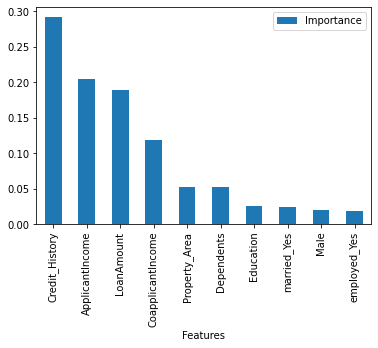

In [67]:
importances.plot.bar()

>Credit History has maximum importance and Employment has the least.

**Inference:** <br>
The Loan status has better relation with features such as Credit History, Applicant's Income, Loan Amount needed by them, Family status(Depenedents) and Property Area which are generally considered by the loan providing organisations. These factors are hence used to take correct decisions to provide loan status or not. This data analysis hence gives a realisation of features and the relation between them from the older decision examples hence giving a learning to predict the class of the unseen data.



Finally we predict over unseen dataset using Logistic Regression 

In [68]:
df_test = test.drop("Loan_ID",axis=1)

In [69]:
df_test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,0,0,5720,0,110,1.0,0,1,0,1
1,1,0,3076,1500,126,1.0,0,1,0,1
2,2,0,5000,1800,208,1.0,0,1,0,1
3,2,0,2340,2546,100,1.0,0,1,0,1
4,0,1,3276,0,78,1.0,0,1,0,0


In [70]:
p_log = logmodel.predict(df_test)

In [71]:
predict_combine = np.zeros((df_test.shape[0]))

for i in range(0, test.shape[0]):
    temp = p_log[i]
    if temp==1:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')
predict_combine = ['Y' if p == 1 else 'N' for p in predict_combine]

final_submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": predict_combine
    })

final_submission.to_csv("logistic_regression_results.csv", encoding='utf-8', index=False)